In [73]:
# data loading and processing
import numpy as np
import pandas as pd

# model 
from sklearn.linear_model import LogisticRegression

# model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score 

# evaluation metrics
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, precision_score, recall_score, roc_auc_score
from sklearn.metrics import roc_curve, precision_recall_curve

## Preprocessing

In [74]:
data = pd.read_csv("spotify-2023.csv", encoding = "ISO-8859-1")

In [75]:
data.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [76]:
data["in_spotify_charts"].value_counts()

0      405
4       48
2       42
6       36
3       18
      ... 
76       1
58       1
79       1
66       1
147      1
Name: in_spotify_charts, Length: 82, dtype: int64

<AxesSubplot:>

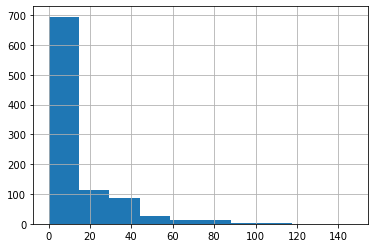

In [77]:
data["in_spotify_charts"].hist()

In [78]:
data["in_spotify_charts"].describe()

count    953.000000
mean      12.009444
std       19.575992
min        0.000000
25%        0.000000
50%        3.000000
75%       16.000000
max      147.000000
Name: in_spotify_charts, dtype: float64

In [79]:
data["label"] = data["in_spotify_charts"] >= 12
data["label"] = data["label"].astype(int)

In [80]:
data["label"]

0      1
1      1
2      1
3      1
4      1
      ..
948    0
949    0
950    0
951    0
952    0
Name: label, Length: 953, dtype: int32

In [81]:
data["label"].value_counts()

0    650
1    303
Name: label, dtype: int64

In [82]:
# how to deal with this unbalanced case? 

In [83]:
data.shape

(953, 25)

In [84]:
data["artist(s)_name"].value_counts()

Taylor Swift                 34
The Weeknd                   22
Bad Bunny                    19
SZA                          19
Harry Styles                 17
                             ..
Karol G, Ovy On The Drums     1
Coolio, L.V.                  1
Kordhell                      1
Kenia OS                      1
Feid, Sech, Jhayco            1
Name: artist(s)_name, Length: 645, dtype: int64

In [85]:
# should we include this column? 

In [86]:
data.columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%',
       'label'],
      dtype='object')

In [87]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [88]:
data["key"] = le.fit_transform(data["key"])

In [89]:
data.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,label
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,2,Major,80,89,83,31,0,8,4,1
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,3,Major,71,61,74,7,0,10,4,1
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,7,Major,51,32,53,17,0,31,6,1
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,0,Major,55,58,72,11,0,11,15,1
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,0,Minor,65,23,80,14,63,11,6,1


In [90]:
data["key"][:4]

0    2
1    3
2    7
3    0
Name: key, dtype: int32

In [91]:
data["mode"] = le.fit_transform(data["mode"])

In [92]:
columns_of_interest = ["in_spotify_playlists", "streams", "in_apple_playlists", "in_apple_charts", "mode", "label"]

In [93]:
X = data[columns_of_interest].values.astype(np.int64)
X.shape

ValueError: invalid literal for int() with base 10: 'BPM110KeyAModeMajorDanceability53Valence75Energy69Acousticness7Instrumentalness0Liveness17Speechiness3'

In [94]:
data = data[columns_of_interest]

In [95]:
data.shape

(953, 6)

In [96]:
data = data[data["streams"].apply(lambda x: str(x).isnumeric())]

In [97]:
data["mode"].value_counts()

0    549
1    403
Name: mode, dtype: int64

In [98]:
data["streams"] = data["streams"].astype(np.int64)

In [99]:
X = data.loc[:, data.columns != 'label'].values
X.shape

(952, 5)

In [100]:
y = data["label"].values
y.shape

(952,)

## Classification 

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [107]:
model = LogisticRegression()

In [108]:
X_train.shape

(761, 5)

In [109]:
y_train.shape

(761,)

In [110]:
model.fit(X_train, y_train)
y_score = model.predict_proba(X_test)

In [112]:
y_score.shape

(191, 2)

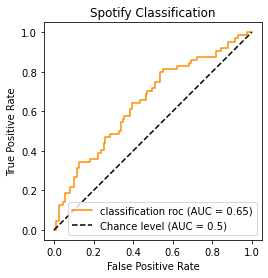

In [118]:
import matplotlib.pyplot as plt

from sklearn.metrics import RocCurveDisplay


RocCurveDisplay.from_predictions(
    y_test,
    y_score[:,0], 
    name=f"classification roc",
    color="darkorange",
    plot_chance_level=True,
)
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Spotify Classification")
plt.legend()
plt.show()

In [119]:
y_pred = model.predict(X_test)

In [120]:
print(accuracy_score(y_pred, y_test))

0.6649214659685864
